# data import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [485]:
weather_path = 'data/weather_train.csv'
weather = pd.read_csv(weather_path)

In [486]:
weather_test_path = 'data/weather_test.csv'
weather_test = pd.read_csv(weather_test_path)

In [135]:
weather.shape

(139773, 9)

In [239]:
weather.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [491]:
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather_test['timestamp'] = pd.to_datetime(weather_test['timestamp'])

In [136]:
random_sample = weather.loc[weather.index[np.random.randint(0, weather.shape[0], (5))]]
random_sample.T

,76057,15244,119721,56102,69110
site_id,8,1,13,6,7
timestamp,2016-09-07 13:00:00,2016-09-26 21:00:00,2016-09-05 10:00:00,2016-05-23 23:00:00,2016-11-22 04:00:00
air_temperature,26.7,13.8,19.4,20.6,-2.5
cloud_coverage,0,0,NaN,2,NaN
dew_temperature,21.1,10.7,17.2,11.7,-3.5
precip_depth_1_hr,0,NaN,94,0,6
sea_level_pressure,1021.7,1022.5,1010,1013.5,1005.8
wind_direction,50,150,200,210,280
wind_speed,3.1,3.1,5.7,2.1,5.7


# features initial examination

## site id

In [171]:
weather['site_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [172]:
np.sum(weather['site_id'].isna())

0

In [173]:
nulls = weather.set_index('site_id').isna().groupby('site_id').sum()

In [317]:
test_nulls = weather_test.set_index('site_id').isna().groupby('site_id').sum()

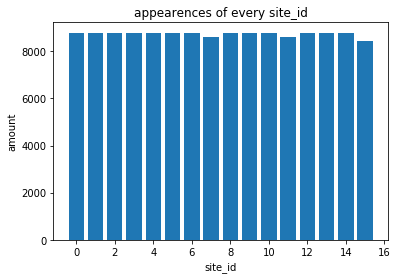

In [174]:
site_id_apearences = weather['site_id'].value_counts()
plt.bar(site_id_apearences.index, site_id_apearences.values)
plt.xlabel('site_id')
plt.ylabel('amount')
plt.title('appearences of every site_id')
plt.show()

In [175]:
site_group = weather.groupby(by = 'site_id')

In [176]:
one_site = weather[weather['site_id'] == 0]

## timestamp

In [253]:
np.sum(weather['timestamp'].isna())

0

In [254]:
one_site['timestamp'].min(), one_site['timestamp'].max()

('2016-01-01 00:00:00', '2016-12-31 23:00:00')

In [255]:
site_group['timestamp'].agg([min, max, len])

,min,max,len
site_id,,,
0,2016-01-01 00:00:00,2016-12-31 23:00:00,8784
1,2016-01-01 00:00:00,2016-12-31 23:00:00,8763
2,2016-01-01 00:00:00,2016-12-31 23:00:00,8783
3,2016-01-01 00:00:00,2016-12-31 23:00:00,8780
4,2016-01-01 01:00:00,2016-12-31 23:00:00,8783
5,2016-01-01 01:00:00,2016-12-31 23:00:00,8755
6,2016-01-01 01:00:00,2016-12-31 23:00:00,8782
7,2016-01-01 00:00:00,2016-12-31 23:00:00,8614
8,2016-01-01 00:00:00,2016-12-31 23:00:00,8784


In [256]:
pd.infer_freq(one_site['timestamp'])

'H'

In [262]:
hour_group = weather.groupby(by=weather['timestamp'].map(lambda x : x.hour))

In [264]:
month_group = weather.groupby(by=weather['timestamp'].map(lambda x : x.month))

In [286]:
def plot_time_cycles(col):
    fig, axs = plt.subplots(1, 2, figsize = (12, 5))
    air_temperature_hour = hour_group[col].agg([min, max, np.mean, np.std])
    air_temperature_hour['mean'].plot.bar(ax = axs[0])
    axs[0].set_xlabel('hour')
    axs[0].set_ylabel(col)
    air_temperature_month = month_group[col].agg([min, max, np.mean, np.std])
    air_temperature_month['mean'].plot.bar(ax = axs[1])
    axs[1].set_xlabel('month')
    axs[1].set_ylabel(col)
    fig.suptitle(f'{col} in different times')
    plt.show()

## air temperature

### null examination

In [521]:
np.sum(weather['air_temperature'].isna())

0

In [522]:
nulls['air_temperature']

site_id
0      3.0
1      1.0
2      1.0
3      4.0
4      0.0
5      2.0
6     10.0
7      0.0
8      3.0
9      5.0
10    24.0
11     0.0
12     0.0
13     1.0
14     1.0
15     0.0
Name: air_temperature, dtype: float64

### site examination

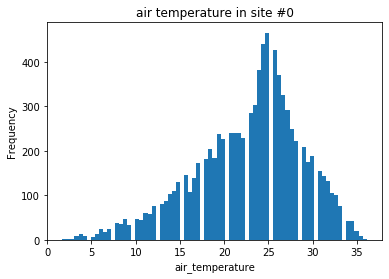

In [523]:
one_site['air_temperature'].plot.hist(bins = 75)
plt.xlabel('air_temperature')
plt.title('air temperature in site #0')
plt.show()

In [288]:
air_temperature = site_group['air_temperature'].agg([min, max, np.mean, np.std])
air_temperature.T

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
min,1.700000,-3.900000,2.200000,-10.600000,1.100000,-3.000000,-13.300000,-28.800000,1.700000,-5.000000,-16.700000,-28.800000,-4.800000,-28.900000,-15.600000,-23.900000
max,36.100000,32.900000,47.200000,37.800000,35.000000,30.000000,37.200000,33.900000,36.100000,39.400000,37.200000,33.900000,26.000000,35.600000,35.600000,33.900000
mean,22.836021,11.711801,24.940321,15.520579,15.236366,10.867931,15.141678,7.888867,22.836021,21.367499,11.644679,7.888867,9.843232,9.879617,13.258409,9.357618
std,6.037417,6.139000,9.119835,10.061688,4.014637,5.091477,9.941153,12.218509,6.037417,7.986912,11.156459,12.218509,5.157759,12.405877,10.254210,10.846760


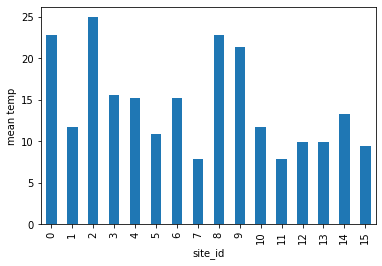

In [524]:
air_temperature['mean'].plot.bar()
plt.ylabel('mean temp')
plt.show()

### time examination

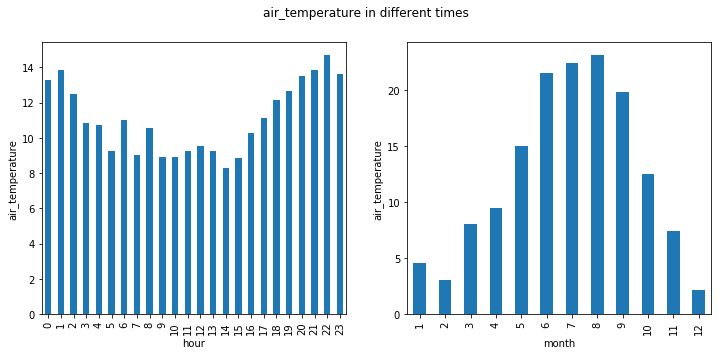

In [525]:
plot_time_cycles('air_temperature')

## cloud coverage

### null examination

In [186]:
np.sum(weather['cloud_coverage'].isna())

69173

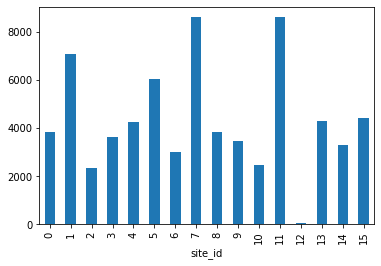

In [187]:
nulls['cloud_coverage'].plot.bar()
plt.show()

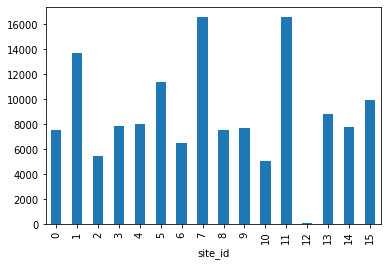

In [318]:
#check that the ability to work with this feature in site 12 remains in test data
test_nulls['cloud_coverage'].plot.bar()
plt.show()

### value examination

In [188]:
sorted(weather['cloud_coverage'].unique())

[6.0, nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0]

### site examination

In [189]:
cloud_coverage = site_group['cloud_coverage'].agg([min, max, np.mean, np.std]).T
cloud_coverage

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,0.00000,NaN,0.000000,0.000000,0.000000,0.000000
max,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,9.00000,9.000000,9.00000,NaN,8.000000,9.000000,9.000000,9.000000
mean,3.04461,0.084656,1.958469,3.879136,1.867999,0.290642,0.647668,NaN,3.04461,0.610673,0.37650,NaN,5.723091,2.873133,0.562203,1.109988
std,2.11878,0.869012,1.914228,2.733435,1.360669,1.591300,1.628221,NaN,2.11878,1.337819,1.33104,NaN,2.242288,2.713202,1.480298,1.679775


### time examination

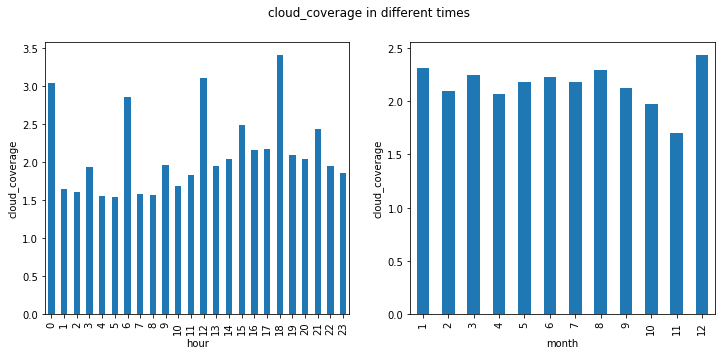

In [290]:
plot_time_cycles('cloud_coverage')

## dew temperature

### null examination

In [190]:
np.sum(weather['dew_temperature'].isna())

113

In [191]:
nulls['dew_temperature']

site_id
0      3.0
1      1.0
2      1.0
3      6.0
4      2.0
5      2.0
6     10.0
7     23.0
8      3.0
9      7.0
10    27.0
11    23.0
12     0.0
13     1.0
14     1.0
15     3.0
Name: dew_temperature, dtype: float64

### site examination

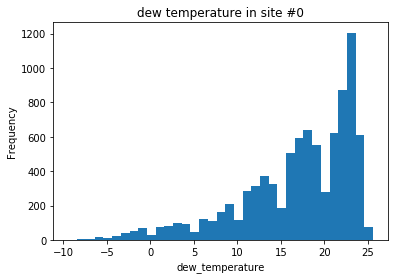

In [192]:
one_site['dew_temperature'].plot.hist(bins = 35)
plt.xlabel('dew_temperature')
plt.title('dew temperature in site #0')
plt.show()

In [193]:
dew_temperature = site_group['dew_temperature'].agg([min, max, np.mean, np.std])
dew_temperature.T

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
min,-9.400000,-8.900000,-17.200000,-22.800000,-9.400000,-6.000000,-23.300000,-35.000000,-9.400000,-13.300000,-20.000000,-35.000000,-5.300000,-31.700000,-25.600000,-26.700000
max,25.600000,20.700000,23.300000,26.100000,18.300000,19.000000,24.400000,22.900000,25.600000,26.100000,15.000000,22.900000,18.300000,25.000000,25.600000,24.400000
mean,16.817880,7.646473,4.069506,8.126214,9.894750,8.194676,7.320691,1.905913,16.817880,14.613302,0.082273,1.905913,6.519966,3.401731,5.775160,4.140469
std,6.519374,5.216089,7.619125,10.688443,3.529137,4.968643,11.108064,10.773200,6.519374,8.502967,5.582579,10.773200,4.615672,11.385367,10.606409,9.998072


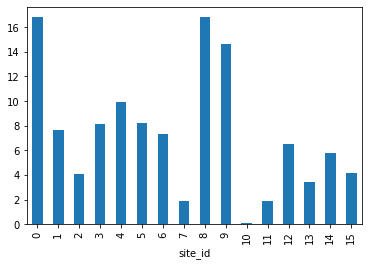

In [194]:
dew_temperature['mean'].plot.bar()
plt.show()

In [195]:
dew_temperature['mean'] < air_temperature['mean']

site_id
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
Name: mean, dtype: bool

### time examination

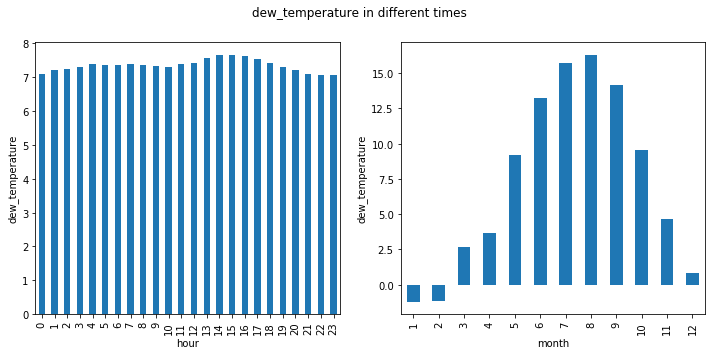

In [291]:
plot_time_cycles('dew_temperature')

## precipitation depth

### null examination

In [196]:
np.sum(weather['precip_depth_1_hr'].isna())

50289

In [197]:
nulls['precip_depth_1_hr']

site_id
0        1.0
1     8763.0
2       66.0
3       37.0
4     1317.0
5     8755.0
6        0.0
7     7883.0
8        1.0
9        7.0
10      27.0
11    7883.0
12    8755.0
13      12.0
14      31.0
15    6751.0
Name: precip_depth_1_hr, dtype: float64

In [320]:
#check that the problem to work with this feature in site 1, 5, 7, 11, 12, 15 remains in test data
test_nulls['precip_depth_1_hr']

site_id
0        30.0
1     17287.0
2        21.0
3        44.0
4       282.0
5     17241.0
6        44.0
7     14776.0
8        30.0
9        63.0
10       38.0
11    14776.0
12    17279.0
13      543.0
14       99.0
15    13035.0
Name: precip_depth_1_hr, dtype: float64

### value examination

In [295]:
weather['precip_depth_1_hr'].value_counts()[0]

77910

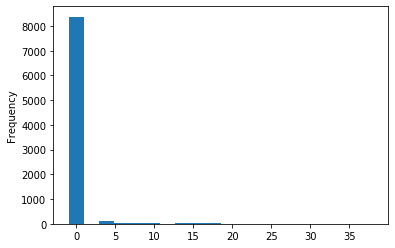

In [199]:
one_site['precip_depth_1_hr'][one_site['precip_depth_1_hr'] < 40].plot.hist(bins = 20)
plt.show()

In [299]:
rainy_weather = weather[weather['precip_depth_1_hr'] > 0]
rainy_weather.shape

(5794, 9)

### site examination

In [306]:
rain_site = rainy_weather.groupby(by = 'site_id')['precip_depth_1_hr'].agg([min, max, np.mean, np.std, len])
rain_site.T

site_id,0,2,3,4,6,7,8,9,10,11,13,14,15
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,343.000000,132.000000,198.000000,124.000000,198.000000,262.000000,343.000000,203.000000,79.000000,262.000000,216.000000,150.000000,333.000000
mean,30.731051,15.778947,14.113924,14.557692,14.819444,11.350205,30.731051,19.461111,10.834550,11.350205,16.531128,13.979960,14.279441
std,52.028565,22.504458,19.555410,17.964567,22.317988,21.274216,52.028565,30.432786,11.265612,21.274216,27.908232,19.385841,27.324893
len,409.000000,95.000000,474.000000,156.000000,504.000000,731.000000,409.000000,360.000000,411.000000,731.000000,514.000000,499.000000,501.000000


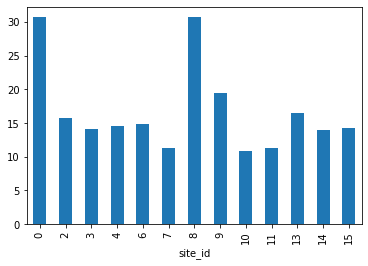

In [313]:
rain_site['mean'].plot.bar()
plt.show()

### time examination

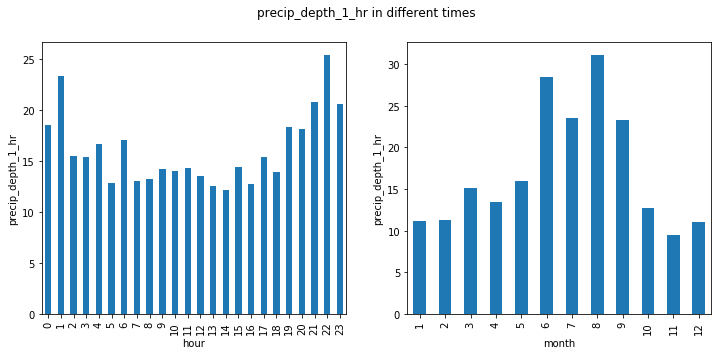

In [315]:
hour_group = rainy_weather.groupby(by=rainy_weather['timestamp'].map(lambda x : x.hour))
month_group = rainy_weather.groupby(by=rainy_weather['timestamp'].map(lambda x : x.month))

col = 'precip_depth_1_hr'
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
air_temperature_hour = hour_group[col].agg([min, max, np.mean, np.std])
air_temperature_hour['mean'].plot.bar(ax = axs[0])
axs[0].set_xlabel('hour')
axs[0].set_ylabel(col)
air_temperature_month = month_group[col].agg([min, max, np.mean, np.std])
air_temperature_month['mean'].plot.bar(ax = axs[1])
axs[1].set_xlabel('month')
axs[1].set_ylabel(col)
fig.suptitle(f'{col} in different times')
plt.show()

## sea level pressure

### null examination

In [200]:
np.sum(weather['sea_level_pressure'].isna())

10618

In [479]:
nulls['sea_level_pressure']

site_id
0       85.0
1       52.0
2       44.0
3      158.0
4       73.0
5     8755.0
6      175.0
7        8.0
8       85.0
9      239.0
10     141.0
11       8.0
12      56.0
13     120.0
14     110.0
15     509.0
Name: sea_level_pressure, dtype: float64

### site examination

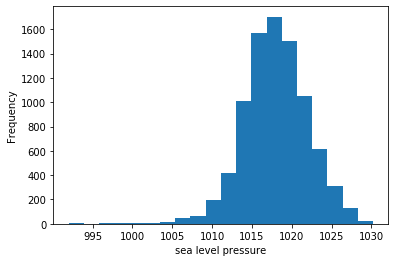

In [206]:
one_site['sea_level_pressure'].plot.hist(bins = 20)
plt.xlabel('sea level pressure')
plt.show()

In [210]:
sea_level_pressure = site_group['sea_level_pressure'].agg([min, max, np.mean, np.std])
sea_level_pressure.T

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
min,992.000000,973.300000,999.300000,991.500000,999.800000,NaN,991.300000,983.600000,992.000000,999.500000,990.500000,983.600000,968.200000,981.600000,989.600000,987.400000
max,1030.200000,1045.500000,1028.200000,1040.900000,1031.700000,NaN,1039.800000,1043.800000,1030.200000,1041.600000,1042.600000,1043.800000,1041.900000,1040.200000,1040.300000,1042.200000
mean,1017.988378,1015.989795,1011.679311,1017.938692,1016.887750,NaN,1017.527954,1015.252010,1017.988378,1016.625114,1015.668788,1015.252010,1014.425474,1015.895371,1016.377985,1016.980579
std,4.036187,10.746261,4.934105,6.931980,4.519844,NaN,6.646051,8.446564,4.036187,6.065054,8.363580,8.446564,11.527693,7.652373,7.251592,7.496048


### time examination

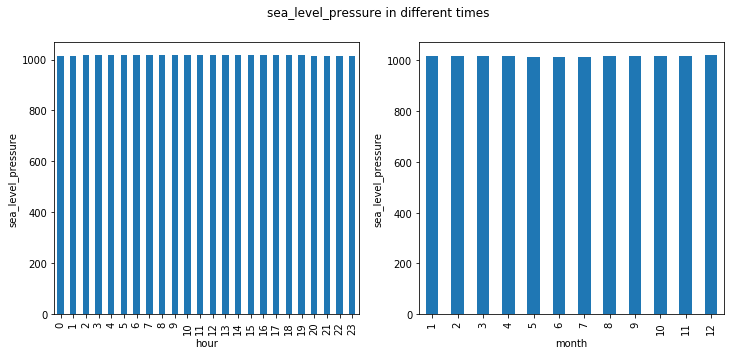

In [292]:
plot_time_cycles('sea_level_pressure')

## wind direction

### null examination

In [211]:
np.sum(weather['wind_direction'].isna())

6268

In [212]:
nulls['wind_direction']

site_id
0      250.0
1        3.0
2      591.0
3      153.0
4      105.0
5      295.0
6      779.0
7        0.0
8      250.0
9     2558.0
10     534.0
11       0.0
12       1.0
13     217.0
14     290.0
15     242.0
Name: wind_direction, dtype: float64

### site examination

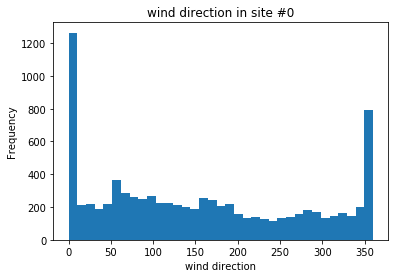

In [220]:
one_site['wind_direction'].plot.hist(bins = 35)
plt.xlabel('wind direction')
plt.title('wind direction in site #0')
plt.show()

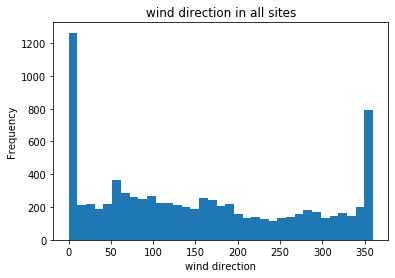

In [221]:
one_site['wind_direction'].plot.hist(bins = 35)
plt.xlabel('wind direction')
plt.title('wind direction in all sites')
plt.show()

### time examination

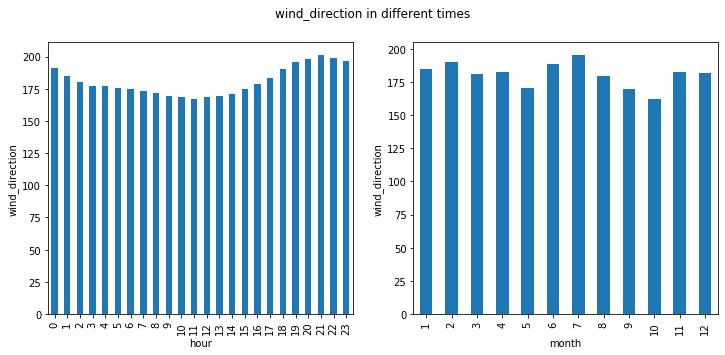

In [293]:
plot_time_cycles('wind_direction')

## wind_speed

### null examination

In [222]:
np.sum(weather['wind_speed'].isna())

304

In [223]:
nulls['wind_speed']

site_id
0       0.0
1       0.0
2       5.0
3       4.0
4       0.0
5       3.0
6      39.0
7       0.0
8       0.0
9      97.0
10    104.0
11      0.0
12      0.0
13      1.0
14     23.0
15     28.0
Name: wind_speed, dtype: float64

### value examination

In [225]:
weather['wind_speed'].value_counts()[0]

13542

In [227]:
weather[weather['wind_speed'] == 0]['wind_direction'].unique()

array([  0., 360.,  nan])

### site examination

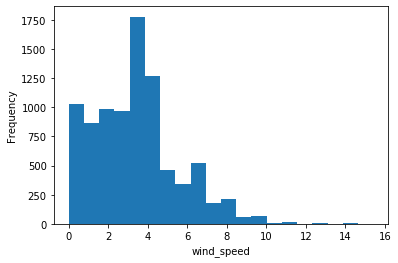

In [231]:
one_site['wind_speed'].plot.hist(bins = 20)
plt.xlabel('wind_speed')
plt.show()

In [232]:
wind_speed = site_group['wind_speed'].agg([min, max, np.mean, np.std])
wind_speed.T

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.400000,18.500000,15.400000,17.000000,16.500000,18.500000,11.300000,12.800000,15.400000,9.300000,16.500000,12.800000,19.000000,16.000000,13.400000,15.400000
mean,3.375114,3.967043,2.932764,3.910893,3.858226,4.768087,2.197758,3.445565,3.375114,2.083658,3.158677,3.445565,5.511399,4.197358,3.076776,3.645490
std,2.154266,2.211536,1.963932,2.282695,2.536447,2.340060,1.875501,1.995291,2.154266,1.519628,2.035429,1.995291,2.733220,2.324516,2.073463,2.457482


### time examination

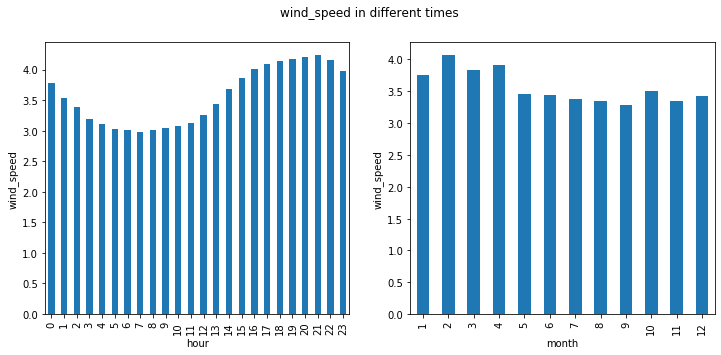

In [294]:
plot_time_cycles('wind_speed')

# data cleaning

## delete repeting site

In [397]:
d = {}
for col in weather.columns:
    diff_places = weather[weather.site_id == 7][col].values != weather[weather.site_id == 11][col].values
    not_null = ~np.logical_or(weather[weather.site_id == 7][col].isna(), weather[weather.site_id == 11][col].isna())
    places = np.logical_and(diff_places, not_null)
    indices = np.arange(8614)
    d[col] = np.all(~places)
print(d)

d = {}
for col in weather_test.columns:
    diff_places = weather_test[weather_test.site_id == 7][col].values != weather_test[weather_test.site_id == 11][col].values
    not_null = ~np.logical_or(weather_test[weather_test.site_id == 7][col].isna(), weather_test[weather_test.site_id == 11][col].isna())
    places = np.logical_and(diff_places, not_null)
    indices = np.arange(8614)
    d[col] = np.all(~places)
print(d)

{'site_id': False, 'timestamp': True, 'air_temperature': True, 'cloud_coverage': True, 'dew_temperature': True, 'precip_depth_1_hr': True, 'sea_level_pressure': True, 'wind_direction': True, 'wind_speed': True}
{'site_id': False, 'timestamp': True, 'air_temperature': True, 'cloud_coverage': True, 'dew_temperature': True, 'precip_depth_1_hr': True, 'sea_level_pressure': True, 'wind_direction': True, 'wind_speed': True}


In [499]:
#above test means sites 7, 11 are identical in data (train and test), so had to be united:

weather = weather.drop(weather.index[weather.site_id == 11])
weather_test = weather_test.drop(weather_test.index[weather_test.site_id == 11])

## filling nulls

In [512]:
hour_means = {i: weather[weather.site_id == i].groupby(by=weather['timestamp'].map(lambda x : x.hour)).mean()
              for i in weather.site_id.unique()}
month_means = {i: weather[weather.site_id == i].groupby(by=weather['timestamp'].map(lambda x : x.month)).mean() 
               for i in weather.site_id.unique()}
time_means = {i: weather[weather.site_id == i].groupby(by=weather['timestamp'].map(lambda x : (x.month, x.hour))).mean() 
              for i in weather.site_id.unique()}

In [515]:
def fill_missing_by_time(row, w, col, criteria):
    if criteria not in ['h', 'm', 't']:
        return row[col]
    site = row['site_id']
    if criteria == 'h':
        return hour_means[site][col][row['timestamp'].hour] if pd.isnull(row[col]) else row[col]
    elif criteria == 'm':
        return month_means[site][col][row['timestamp'].month] if pd.isnull(row[col]) else row[col]
    return time_means[site][col][(row['timestamp'].month, row['timestamp'].hour)] if pd.isnull(row[col]) else row[col]

In [519]:
weather['air_temperature'] = weather.apply(lambda row: fill_missing_by_time(row, weather, 'air_temperature', 't'), axis = 1)
weather_test['air_temperature'] = weather_test.apply(lambda row: fill_missing_by_time(row, weather_test, 'air_temperature', 't'), axis = 1)

weather['dew_temperature'] = weather.apply(lambda row: fill_missing_by_time(row, weather, 'dew_temperature', 'm'), axis = 1)
weather_test['dew_temperature'] = weather_test.apply(lambda row: fill_missing_by_time(row, weather_test, 'dew_temperature', 'm'), axis = 1)

weather['sea_level_pressure'] = weather.apply(lambda row: fill_missing_by_time(row, weather, 'sea_level_pressure', 't'), axis = 1)
weather_test['sea_level_pressure'] = weather_test.apply(lambda row: fill_missing_by_time(row, weather_test, 'sea_level_pressure', 't'), axis = 1)
weather['sea_level_pressure'] = weather.apply(lambda row: np.nan if row['site_id'] == 5 else row['sea_level_pressure'], axis = 1)
weather_test['sea_level_pressure'] = weather_test.apply(lambda row: np.nan if row['site_id'] == 5 else row['sea_level_pressure'], axis = 1)

weather['wind_direction'] = weather.apply(lambda row: fill_missing_by_time(row, weather, 'wind_direction', 'h'), axis = 1)
weather_test['wind_direction'] = weather_test.apply(lambda row: fill_missing_by_time(row, weather_test, 'wind_direction', 'h'), axis = 1)

weather['wind_speed'] = weather.apply(lambda row: fill_missing_by_time(row, weather, 'wind_speed', 'h'), axis = 1)
weather_test['wind_speed'] = weather_test.apply(lambda row: fill_missing_by_time(row, weather_test, 'wind_speed', 'h'), axis = 1)

## indicative features

In [529]:
np.sum(weather.isna())

site_id                   0
timestamp                 0
air_temperature           0
cloud_coverage        60559
dew_temperature           0
precip_depth_1_hr     42406
sea_level_pressure     8755
wind_direction            0
wind_speed                0
dtype: int64

In [530]:
weather = weather.fillna(-1)

weather['has_cloud_coverage'] = weather['cloud_coverage'] != -1
weather['has_precip_depth_1_hr'] = weather['precip_depth_1_hr'] != -1
weather['has_sea_level_pressure'] = weather['sea_level_pressure'] != -1

In [531]:
np.sum(weather_test.isna())

site_id                    0
timestamp                  0
air_temperature            0
cloud_coverage        123875
dew_temperature            0
precip_depth_1_hr      80812
sea_level_pressure     17241
wind_direction             0
wind_speed                 0
dtype: int64

In [532]:
weather_test = weather_test.fillna(-1)

weather_test['has_cloud_coverage'] = weather_test['cloud_coverage'] != -1
weather_test['has_precip_depth_1_hr'] = weather_test['precip_depth_1_hr'] != -1
weather_test['has_sea_level_pressure'] = weather_test['sea_level_pressure'] != -1

## save files

In [534]:
weather.to_csv('data/clean_weather_train.csv')
weather_test.to_csv('data/clean_weather_test.csv')